In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [2]:
# Load dataset
file_path = '/content/credit card fraud detection.csv'
df = pd.read_csv(file_path)

In [3]:
# Preprocess data
df.dropna(inplace=True)
encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col])
    encoders[col] = encoder

In [4]:
features = df.drop(columns=['is_fraud'])
target = df['is_fraud']

In [5]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.3, random_state=42)

In [7]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
predictions = log_reg.predict(X_test)

In [8]:
print("Logistic Regression Model")
print(classification_report(y_test, predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))
print(f"ROC AUC: {roc_auc_score(y_test, predictions)}\n")

Logistic Regression Model
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     80850
         1.0       0.00      0.00      0.00       610

    accuracy                           0.99     81460
   macro avg       0.50      0.50      0.50     81460
weighted avg       0.99      0.99      0.99     81460

Confusion Matrix:
[[80798    52]
 [  610     0]]
ROC AUC: 0.49967841682127395



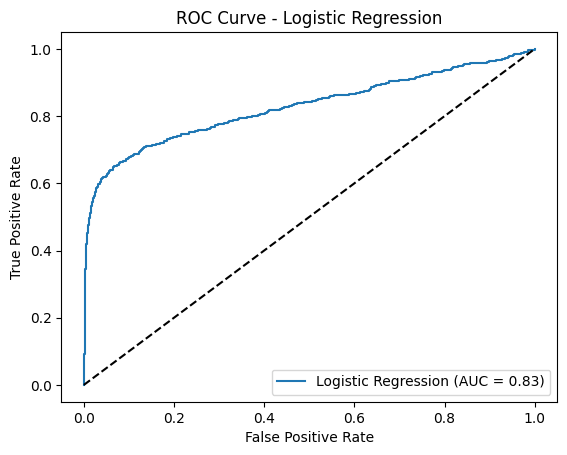

In [9]:
# ROC Curve
pred_probabilities = log_reg.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, pred_probabilities)
plt.figure()
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, pred_probabilities):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.show()

In [14]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)

In [15]:
print("Random Forest Model")
print(classification_report(y_test, predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))
print(f"ROC AUC: {roc_auc_score(y_test, predictions)}\n")

Random Forest Model
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     80850
         1.0       0.94      0.61      0.74       610

    accuracy                           1.00     81460
   macro avg       0.97      0.80      0.87     81460
weighted avg       1.00      1.00      1.00     81460

Confusion Matrix:
[[80826    24]
 [  238   372]]
ROC AUC: 0.8047696097813194



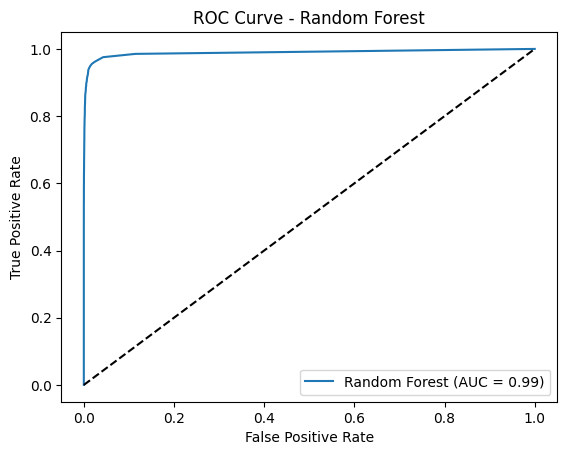

In [16]:
# ROC Curve
pred_probabilities = rf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, pred_probabilities)
plt.figure()
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc_score(y_test, pred_probabilities):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.show()

In [18]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
predictions = gb.predict(X_test)

In [19]:
print("Gradient Boosting Model")
print(classification_report(y_test, predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))
print(f"ROC AUC: {roc_auc_score(y_test, predictions)}\n")

Gradient Boosting Model
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     80850
         1.0       0.81      0.63      0.71       610

    accuracy                           1.00     81460
   macro avg       0.91      0.82      0.85     81460
weighted avg       1.00      1.00      1.00     81460

Confusion Matrix:
[[80762    88]
 [  225   385]]
ROC AUC: 0.8150295528047284



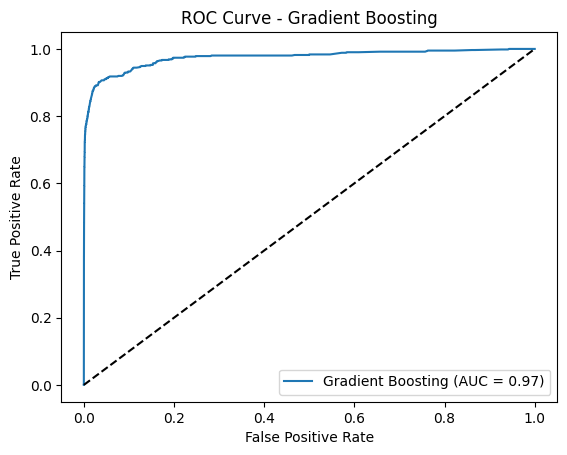

In [20]:
# ROC Curve
pred_probabilities = gb.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, pred_probabilities)
plt.figure()
plt.plot(fpr, tpr, label=f'Gradient Boosting (AUC = {roc_auc_score(y_test, pred_probabilities):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boosting')
plt.legend(loc='lower right')
plt.show()